In [1]:
import geopandas as gpd
import geojsonio

%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
data = gpd.read_file("earthquakes_data_json.geojson")

In [3]:
data.head()



,date,depth,mag,id,place,geometry
0,19600102,15.0,6.3,iscgem877909,Bouvet Island region,POINT (-1.89000 -55.87700)
1,19600103,15.0,5.7,iscgem877920,"northern Xinjiang, China",POINT (84.54200 43.70000)
2,19600104,15.0,6.1,iscgemsup877930,Djibouti,POINT (42.60900 11.37400)
3,19600107,55.0,5.5,iscgem877960,"Nicobar Islands, India region",POINT (94.54700 6.35200)
4,19600107,15.0,5.6,iscgem877954,"Nicobar Islands, India region",POINT (94.75600 6.41800)


In [4]:
data.geometry.unique()

<GeometryArray>
 ...
Length: 24632, dtype: geometry

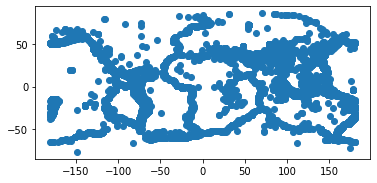

In [5]:
data.plot()

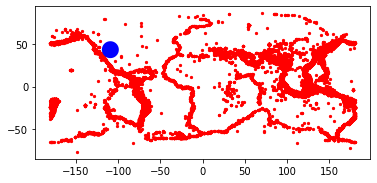

In [53]:
# Create Fake Data
df = pd.DataFrame(data)

df.head()

# create Geometry series with lat / longitude
geometry = [Point(xy) for xy in (df.geometry)]


# df = df.drop(['Longitude', 'Latitude'], axis = 1)

# Create GeoDataFrame
points = gp.GeoDataFrame(df, crs=None, geometry=geometry)

# Create Matplotlib figure
fig, ax = plt.subplots()

# Set Axes to equal (otherwise plot looks weird)
ax.set_aspect('equal')

# Plot GeoDataFrame on Axis ax
points.plot(ax=ax,marker='o', color='red', markersize=5)

# Create new point
center_coord = [Point(-109.1, 43.8)]
center = gp.GeoDataFrame(crs=None, geometry=center_coord)

# Plot new point
center.plot(ax=ax,color = 'blue',markersize=5)
# Buffer point and plot it
circle = gp.GeoDataFrame(crs=None, geometry=center.buffer(10.0))

circle.plot(color = 'blue',ax=ax)

           date   depth   mag            id  \
658    19620830  15.000  5.90  iscgem875249   
1842   19660816  10.000  5.70  iscgem844550   
1909   19661220   1.200  5.62     ci3329931   
2241   19680426   1.200  5.63     ci3342128   
2473   19681219   1.400  5.52     ci3342181   
2724   19690916   1.200  5.82     ci3326197   
2876   19700326   1.200  5.54     ci3325031   
4067   19730606   1.100  5.64     ci3319623   
4758   19750328   5.000  6.10    usp0000ad8   
4861   19750626   6.000  5.52    ci12328563   
4863   19750630   7.000  5.90    usp0000buf   
5017   19751028   1.300  5.67     ci3006257   
5099   19760103   1.500  5.84     ci3001652   
5175   19760212   1.200  5.81     ci3002022   
5209   19760314   1.300  5.84     ci3002345   
5210   19760317   0.900  5.52     ci3002390   
5527   19761208   5.000  5.50    usp0000kp6   
8112   19831028  10.000  6.90    usp0001zbv   
8113   19831029  10.000  5.50    usp0001zda   
8477   19840822  10.000  5.60    usp00026m2   
10441  198808

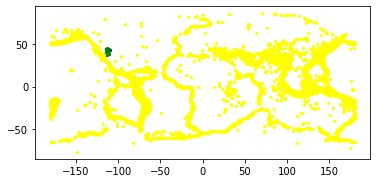

In [54]:
# Calculate the points inside the circle 

pointsinside = gp.sjoin(points,circle,how="inner")
print(pointsinside)
pointsinside.type


# Now the points outside the circle is just the difference 
# between  points and points inside (see the ~)

pointsoutside = points[~points.index.isin(pointsinside.index)]


# Create a nice plot 
fig, ax = plt.subplots()
ax.set_aspect('equal')
circle.plot(color = 'white',ax=ax)
center.plot(ax=ax,color = 'blue',markersize=5)
pointsinside.plot(ax=ax,marker='o', color='green', markersize=5)

pointsoutside.plot(ax=ax,marker='o', color='yellow', markersize=5)

print('Total points:' ,len(points))
print('Points inside circle:' ,len(pointsinside))
print('Points outside circle:' ,len(pointsoutside))

In [55]:
pointsinside.type

658      Point
1842     Point
1909     Point
2241     Point
2473     Point
2724     Point
2876     Point
4067     Point
4758     Point
4861     Point
4863     Point
5017     Point
5099     Point
5175     Point
5209     Point
5210     Point
5527     Point
8112     Point
8113     Point
8477     Point
10441    Point
12384    Point
13067    Point
18779    Point
20157    Point
dtype: object

In [56]:
pointsinside.apply(lambda x: x.name).to_dict()

{'date': 'date',
 'depth': 'depth',
 'mag': 'mag',
 'id': 'id',
 'place': 'place',
 'geometry': 'geometry',
 'index_right': 'index_right'}

In [57]:
pointsinside["geometry"]

658      POINT (-111.49700 41.96100)
1842     POINT (-114.15700 37.38000)
1909     POINT (-116.40800 37.30220)
2241     POINT (-116.45600 37.29530)
2473     POINT (-116.47400 37.23150)
2724     POINT (-116.46100 37.31420)
2876     POINT (-116.53400 37.30050)
4067     POINT (-116.34600 37.24500)
4758     POINT (-112.54800 42.06100)
4861     POINT (-116.36900 37.27880)
4863     POINT (-110.60500 44.74500)
5017     POINT (-116.41100 37.29020)
5099     POINT (-116.33300 37.29650)
5175     POINT (-116.48800 37.27130)
5209     POINT (-116.47100 37.30600)
5210     POINT (-116.31200 37.25580)
5527     POINT (-110.79300 44.76000)
8112     POINT (-113.85700 44.05800)
8113     POINT (-114.11500 44.28100)
8477     POINT (-114.00800 44.46700)
10441    POINT (-110.86900 39.12800)
12384    POINT (-113.47200 37.09000)
13067    POINT (-110.97600 42.76200)
18779    POINT (-112.61500 45.36500)
20157    POINT (-114.87200 41.14440)
Name: geometry, dtype: geometry

In [58]:
pointsinside['lat'] = pointsinside['geometry'].x
pointsinside['long'] = pointsinside['geometry'].y
pointsinside

,date,depth,mag,id,place,geometry,index_right,lat,long
658,19620830,15.000,5.90,iscgem875249,Utah,POINT (-111.49700 41.96100),0,-111.497,41.9610
1842,19660816,10.000,5.70,iscgem844550,Nevada,POINT (-114.15700 37.38000),0,-114.157,37.3800
1909,19661220,1.200,5.62,ci3329931,"53km NE of Beatty, NV",POINT (-116.40800 37.30220),0,-116.408,37.3022
2241,19680426,1.200,5.63,ci3342128,"50km NNE of Beatty, NV",POINT (-116.45600 37.29530),0,-116.456,37.2953
2473,19681219,1.400,5.52,ci3342181,"44km NE of Beatty, NV",POINT (-116.47400 37.23150),0,-116.474,37.2315
2724,19690916,1.200,5.82,ci3326197,"52km NNE of Beatty, NV",POINT (-116.46100 37.31420),0,-116.461,37.3142
2876,19700326,1.200,5.54,ci3325031,"48km NNE of Beatty, NV",POINT (-116.53400 37.30050),0,-116.534,37.3005
4067,19730606,1.100,5.64,ci3319623,"52km NE of Beatty, NV",POINT (-116.34600 37.24500),0,-116.346,37.2450
4758,19750328,5.000,6.10,usp0000ad8,southern Idaho,POINT (-112.54800 42.06100),0,-112.548,42.0610
4861,19750626,6.000,5.52,ci12328563,"54km NE of Beatty, NV",POINT (-116.36900 37.27880),0,-116.369,37.2788


In [59]:
pointsinside.to_dict('records')

[{'date': 19620830,
  'depth': 15.0,
  'mag': 5.9,
  'id': 'iscgem875249',
  'place': 'Utah',
  'geometry': <shapely.geometry.point.Point at 0x1ee1d4bb5c8>,
  'index_right': 0,
  'lat': -111.497,
  'long': 41.961},
 {'date': 19660816,
  'depth': 10.0,
  'mag': 5.7,
  'id': 'iscgem844550',
  'place': 'Nevada',
  'geometry': <shapely.geometry.point.Point at 0x1ee1e874cc8>,
  'index_right': 0,
  'lat': -114.157,
  'long': 37.38},
 {'date': 19661220,
  'depth': 1.2,
  'mag': 5.62,
  'id': 'ci3329931',
  'place': '53km NE of Beatty, NV',
  'geometry': <shapely.geometry.point.Point at 0x1ee1e8708c8>,
  'index_right': 0,
  'lat': -116.408,
  'long': 37.3022},
 {'date': 19680426,
  'depth': 1.2,
  'mag': 5.63,
  'id': 'ci3342128',
  'place': '50km NNE of Beatty, NV',
  'geometry': <shapely.geometry.point.Point at 0x1ee1e85c6c8>,
  'index_right': 0,
  'lat': -116.456,
  'long': 37.2953},
 {'date': 19681219,
  'depth': 1.4,
  'mag': 5.52,
  'id': 'ci3342181',
  'place': '44km NE of Beatty, NV',


In [60]:
# ask the user for lat and long, and radius
# 2: manipulation from above to get the pointsinside
# turn pointsinside dict into a json 
# serve as a json/api and consume in javascript 

# do all of this inside app.py 